---

# <center>★ AI / ML Research Implementation - Inception V1 ★


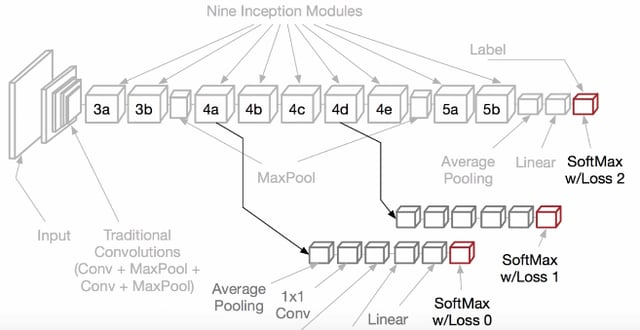

---

## Lí thuyết về Inception v1(GoogLeNet)
#### **Lớp khởi tạo là gì:** là sự kết hợp của tất cả các lớp đó (cụ thể là lớp tích chập 1×1, lớp tích chập 3×3, lớp tích chập 5×5) với các ngân hàng bộ lọc đầu ra của chúng được nối lại thành một vectơ đầu ra duy nhất tạo thành đầu vào của giai đoạn tiếp theo.
#### 1.1. Tích chập 1x1
Mục tiêu của phép tích chập 1x1 là giảm kích thước của dữ liệu đầu vào bằng cách gộp kênh. Theo cách này, độ sâu của mạng có thể tăng lên mà không có nguy cơ quá khớp.

Trong lớp tích chập 1x1 (còn được gọi là lớp nút thắt), chúng tôi tính toán tích chập giữa mỗi pixel của hình ảnh và bộ lọc trong chiều kênh. Kết quả là, đầu ra sẽ có cùng chiều cao và chiều rộng như đầu vào, nhưng số kênh đầu ra sẽ thay đổi.

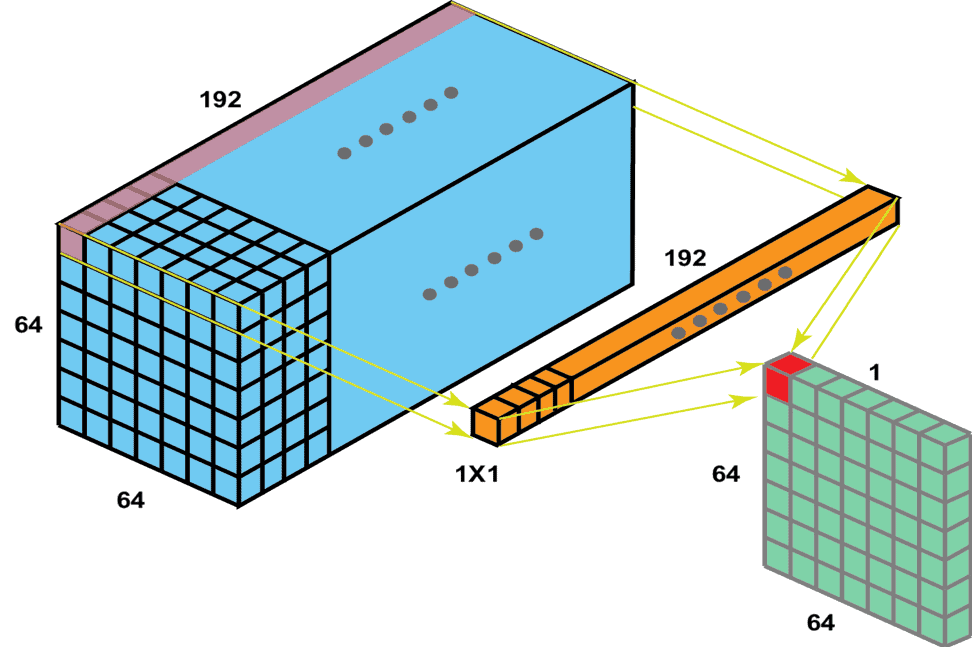
#### Tích chập 3x3 và 5x5
Mục tiêu của phép tích chập 3x3 và 5x5 là tìm hiểu các đặc điểm không gian ở các tỷ lệ khác nhau.

Cụ thể, bằng cách tận dụng các bộ lọc tích chập có kích thước khác nhau, mạng học các mẫu không gian ở nhiều thang đo như mắt người. Như chúng ta có thể dễ dàng hiểu, 3x3 học các đặc điểm ở thang đo nhỏ trong khi 5x5 học các đặc điểm ở thang đo lớn hơn.
#### Kiến trúc tổng thể 
Áp dụng từng khối khởi tạo trong đầu vào riêng biệt và sau đó nối các đặc điểm đầu ra trong chiều kênh. Để làm điều này, chúng ta cần đảm bảo rằng các đặc điểm được trích xuất có cùng chiều rộng và chiều cao. Vì vậy, chúng ta áp dụng same padding trong mọi phép tích chập.

Dưới đây, chúng ta có thể thấy một ví dụ trong đó đầu vào có kích thước (28, 28, 192) và đầu ra có kích thước (28, 28, kênh) trong đó các kênh bằng tổng các kênh được trích xuất từ ​​mỗi khối còn lại:
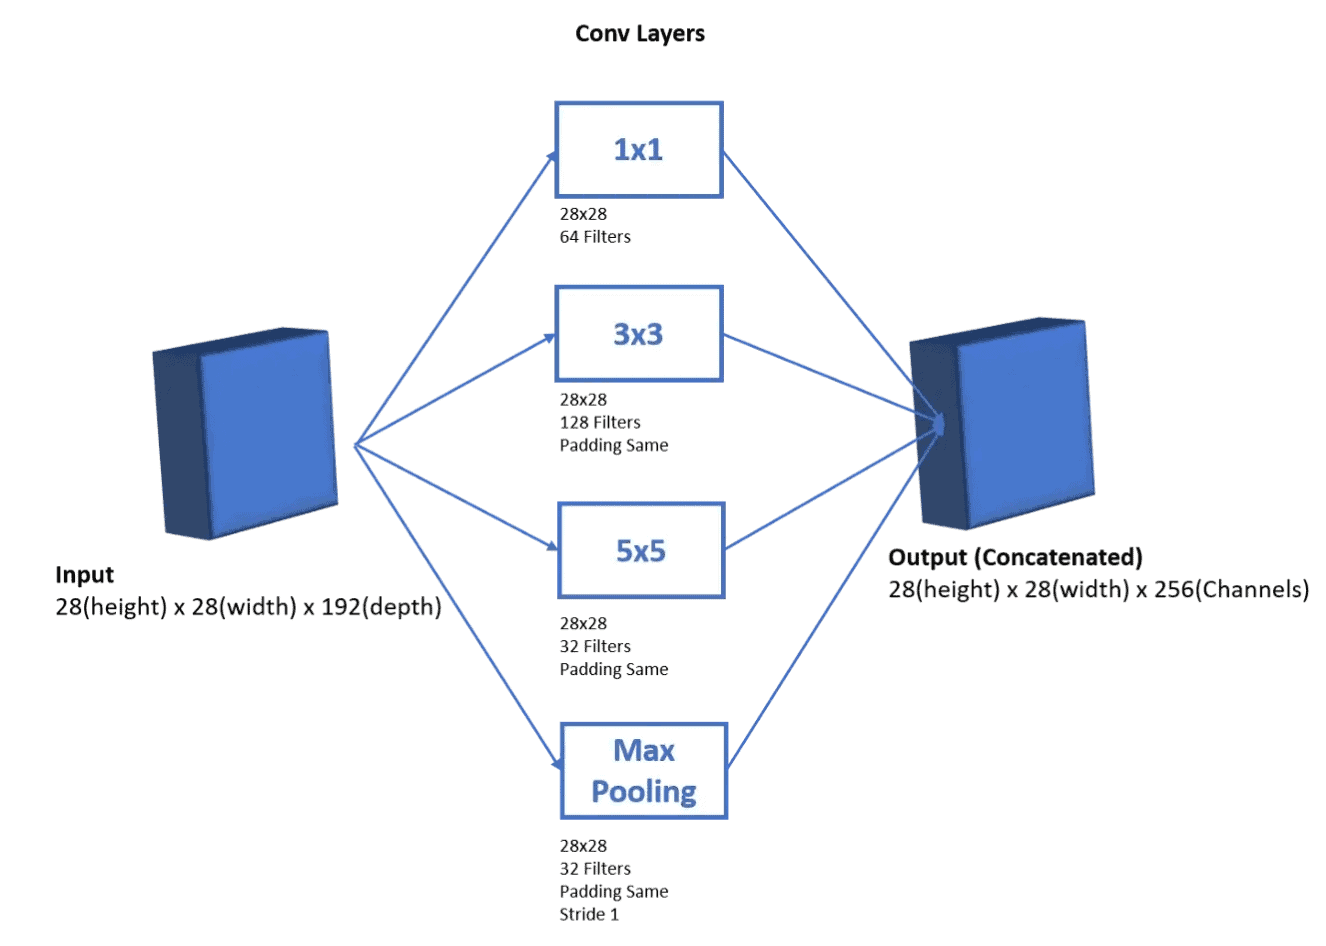

Nhược điểm của việc triển khai đơn giản là chi phí tính toán do có quá nhiều tham số trong các lớp tích chập.

Giải pháp được đề xuất là tận dụng các phép tích chập 1x1 có khả năng giảm kích thước đầu vào, giúp giảm đáng kể chi phí tính toán.

Một lớp Max Pooling song song, cung cấp một tùy chọn khác cho lớp khởi tạo

Dưới đây, chúng ta có thể thấy cách kiến ​​trúc khởi tạo được cải tiến được định nghĩa. Chúng ta có thể thấy rằng trước mỗi phép tích chập 3x3 và 5x5, chúng ta thêm phép tích chập 1x1 để giảm kích thước của các tính năng:
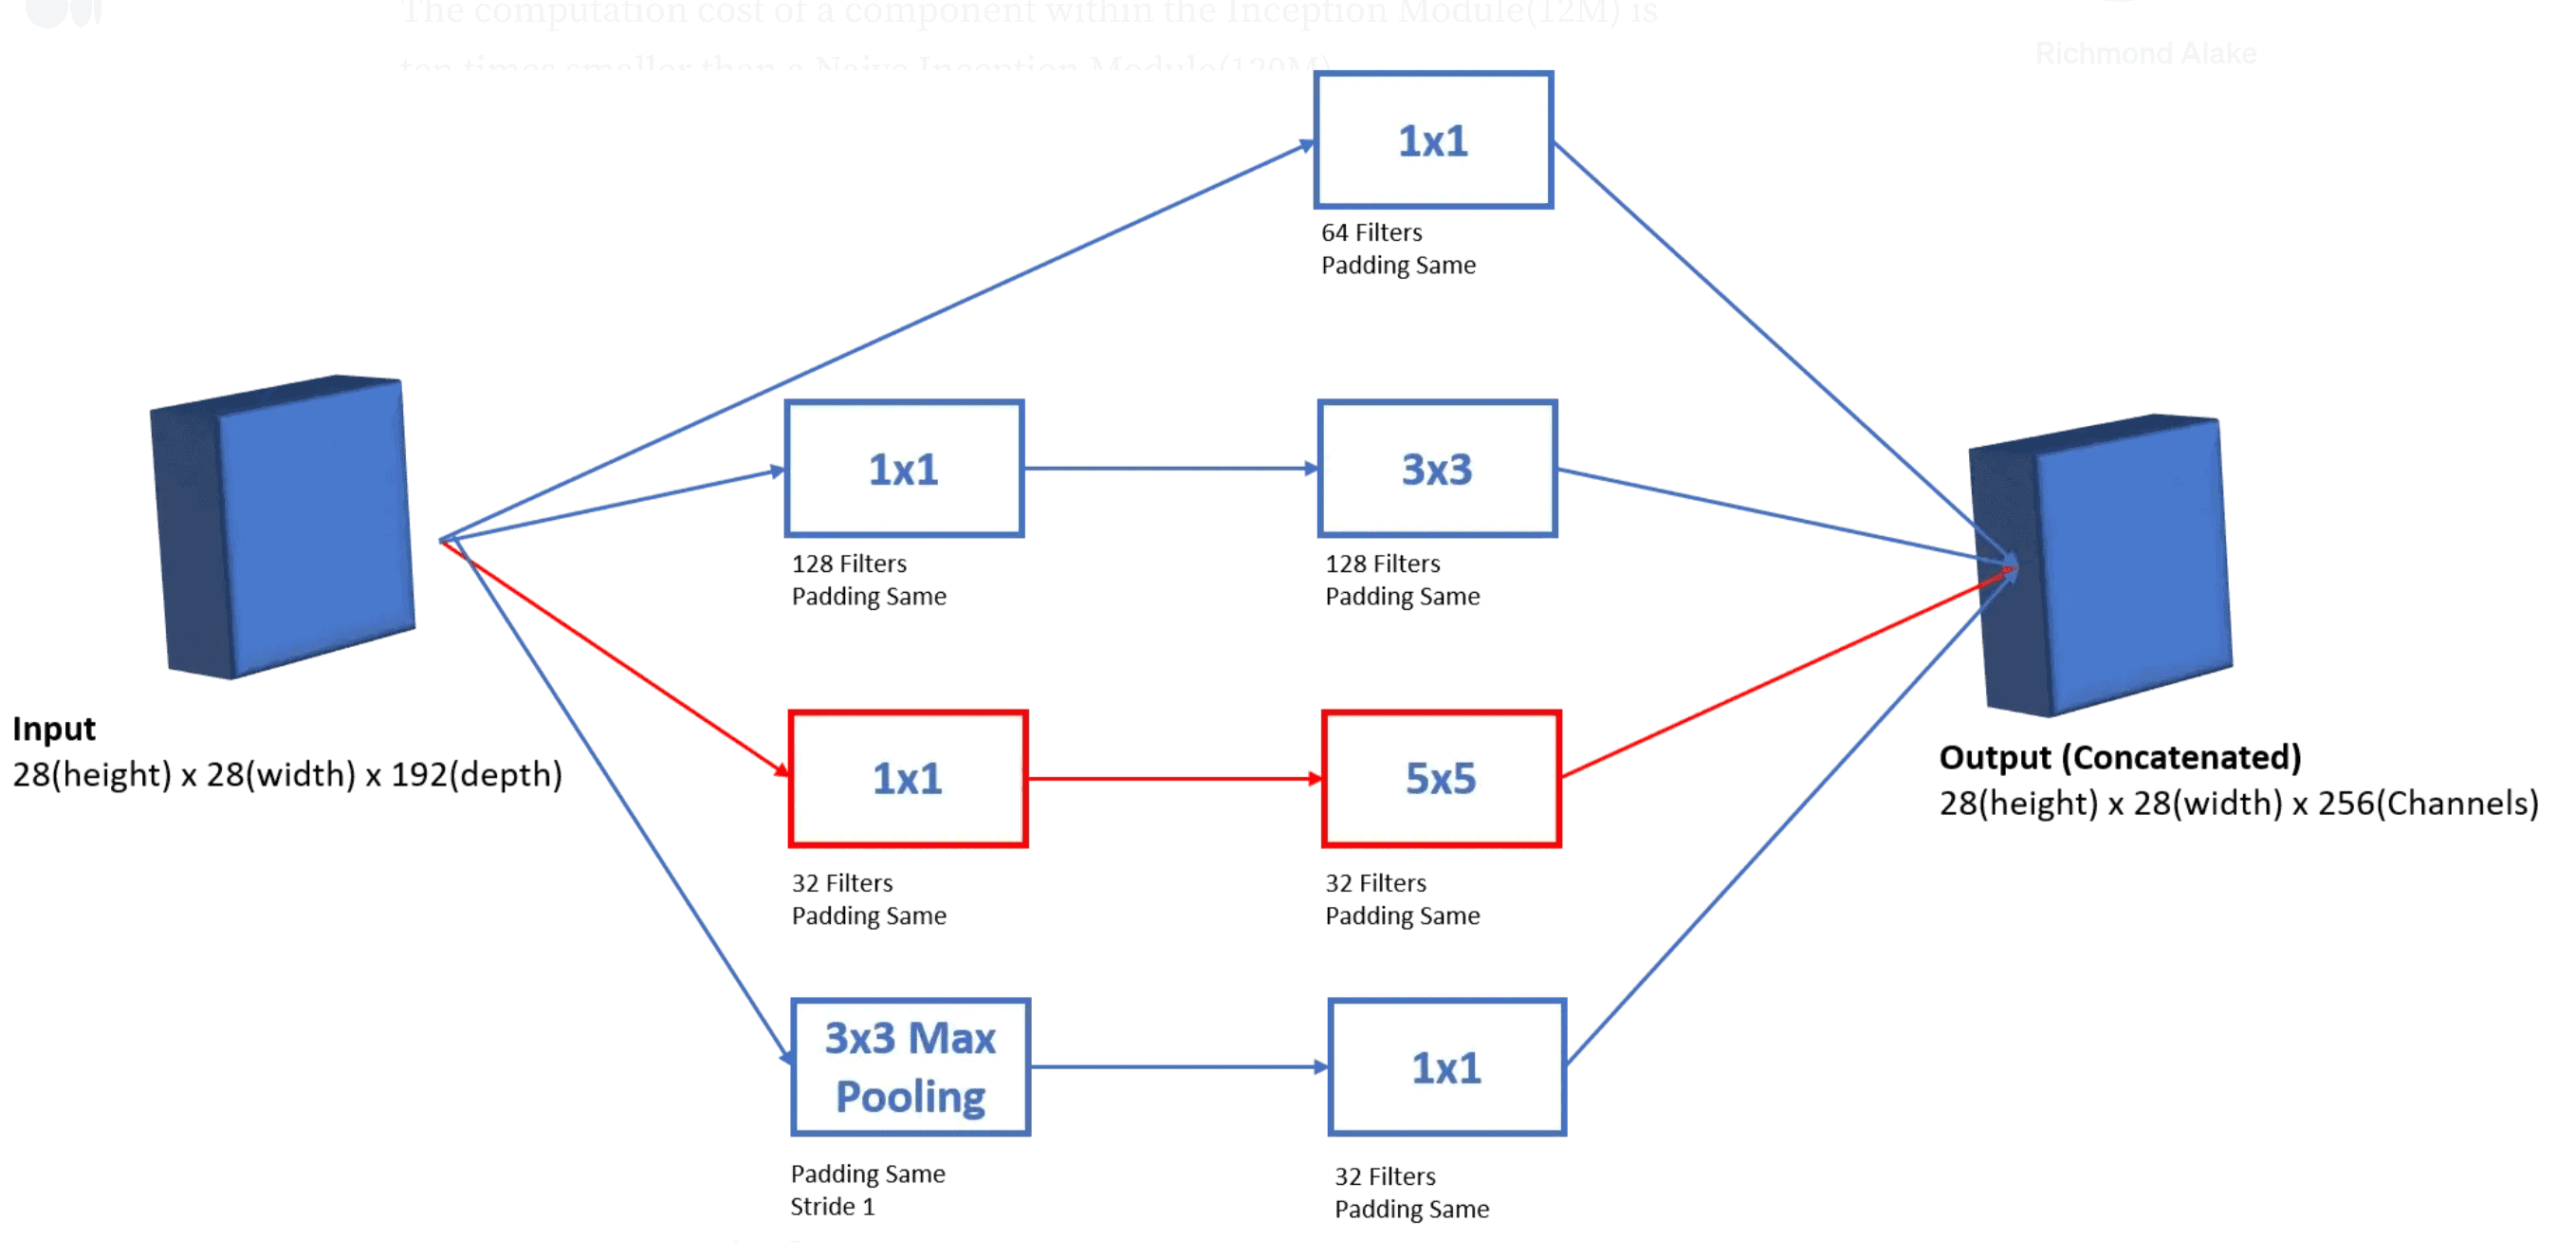

### Tại sao lại có nhiều đầu ra softmax trên model
GoogLeNet có ba lớp softmax đầu ra, trong đó hai lớp đầu ra bổ sung được gọi là auxiliary classifiers (các lớp phân loại phụ trợ). Dưới đây là các mục đích và lợi ích của việc sử dụng nhiều lớp softmax đầu ra:

### 1. Ngăn Ngừa Hiện Tượng Vanishing Gradient

Một trong những vấn đề chính khi huấn luyện các mạng sâu là hiện tượng vanishing gradient, trong đó các gradient trở nên quá nhỏ khi truyền ngược qua các lớp, dẫn đến việc cập nhật trọng số không hiệu quả. Các lớp auxiliary classifiers giúp giảm thiểu vấn đề này bằng cách thêm các điểm chèn gradient ở các mức trung gian của mạng, giúp gradient mạnh mẽ hơn và lan truyền hiệu quả hơn trong toàn bộ mạng.

### 2. Cải Thiện Hiệu Suất Huấn Luyện

Các lớp auxiliary classifiers hoạt động như các lớp softmax phụ trợ, giúp mạng học tốt hơn bằng cách cung cấp các mục tiêu trung gian. Điều này giúp mạng không chỉ tối ưu hóa đầu ra cuối cùng mà còn các đầu ra ở các giai đoạn giữa, từ đó cải thiện hiệu suất tổng thể của mạng.

### 3. Regularization (Điều Chỉnh)

Các lớp auxiliary classifiers đóng vai trò như một hình thức regularization, giúp giảm thiểu overfitting. Bằng cách buộc các lớp giữa phải đóng góp vào quá trình phân loại, mạng học được các đặc trưng hữu ích hơn và giảm thiểu nguy cơ quá khớp dữ liệu huấn luyện.

### Cách Thức Hoạt Động của Auxiliary Classifiers

Mỗi lớp auxiliary classifier được đặt ở một vị trí khác nhau trong mạng, thường sau một vài Inception module. Mỗi lớp auxiliary classifier bao gồm:

1. **Convolution và Pooling:** Trích xuất các đặc trưng từ đầu vào.
2. **Fully Connected Layers:** Biến đổi các đặc trưng thành các điểm đặc trưng phân loại.
3. **Softmax Layer:** Tính toán xác suất cho từng lớp.
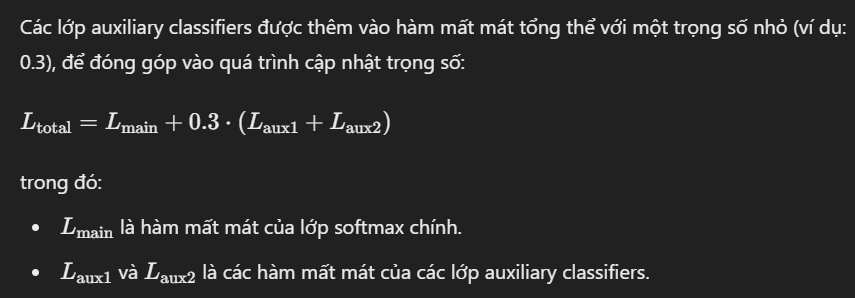

Quy Trình Huấn Luyện với Auxiliary Classifiers
Forward Pass:

Tín hiệu đầu vào được truyền qua các lớp Inception.
Các lớp auxiliary classifiers nhận đầu vào từ các Inception module giữa và tính toán dự đoán phụ trợ.
Backward Pass:

Gradient từ các lớp auxiliary classifiers được tính toán và lan truyền ngược.
Gradient từ các lớp auxiliary classifiers được cộng vào gradient từ lớp softmax chính, giúp cập nhật trọng số của các lớp giữa hiệu quả hơn.
### Tổng Kết

Việc sử dụng nhiều lớp softmax đầu ra, cụ thể là các lớp auxiliary classifiers, trong GoogLeNet mang lại nhiều lợi ích:

- Giúp ngăn ngừa hiện tượng vanishing gradient, cải thiện quá trình huấn luyện của mạng sâu.
- Cải thiện hiệu suất huấn luyện bằng cách cung cấp các mục tiêu trung gian.
- Đóng vai trò như một hình thức regularization, giảm thiểu overfitting.

Trích một đoạn giải thích: 
Kiến trúc sâu, và cụ thể là GoogLeNet (22 lớp) đang gặp nguy cơ về vấn đề biến mất gradient trong quá trình đào tạo (thuật toán lan truyền ngược)

Các nhà phát triển GoogLeNet đã xử lý vấn đề này như thế nào? Họ nhận ra rằng không chỉ các tính năng của các lớp cuối cùng mang tất cả thông tin phân biệt: các tính năng trung gian cũng có khả năng phân biệt các lớp khác nhau; và quan trọng nhất là các giá trị của chúng "đáng tin cậy" hơn vì chúng được trích xuất từ ​​các lớp trước đó mà gradient mang nhiều thông tin hơn. Dựa trên trực giác này, họ đã thêm "bộ phân loại phụ trợ"(auxiliary classifiers) vào hai lớp trung gian. Đây là lý do cho các lớp mất mát "thoát sớm" ở giữa mạng mà bạn đã tham chiếu trong câu hỏi của mình.

The popular versions of the Inception network are as follows:

· Inception v1.

· Inception v2

· Inception v3.

· Inception v4

· Inception-ResNet.

---

## <center> 1. Dataset Prepration

In [2]:
# Importing the basic libraries

import cv2
import math
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from Inception_v1 import InceptionV1

%load_ext autoreload
%autoreload 3


In [3]:
# Preparing the Dataset

num_classes = 10
def load_cifar10_data(img_rows,img_cols):
    # Load training and validation sets
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    # Resize images to 244x244
    X_train = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_train[:500]])
    X_test = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_test[:500]])
    y_train = y_train[:500]
    y_test = y_test[:500]

    # Transform targets to keras compatible format
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

    X_train = tf.cast(X_train, dtype=tf.float32)
    y_train = tf.cast(y_train, dtype=tf.float32)
    

    # Making all the values range between 0 and 1
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    return X_train,y_train,X_test,y_test


X_train,y_train,X_test,y_test = load_cifar10_data(224,224)
X_train.shape,y_train.shape

(TensorShape([500, 224, 224, 3]), TensorShape([500, 10]))

---

## <center>2. Model Development

In [4]:
model = InceptionV1()
model.summary()

c:\Users\himek\miniconda3\envs\dltf\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "inception_v1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv_1_7x7/2 (Conv2D)          (None, 112, 112, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pool_1_3x3/2 (MaxPooling2D  (None, 56, 56, 64)  0           ['conv_1_7x7/2[0][0]']           
 )                                                                                     

---

## <center>3. Model Testing

In [6]:
epochs = 10
initial_lrate = 0.01

def decay(epoch):
    initial_lrate = 0.01
    drop = 0.96
    epochs_drop = 5
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

adam = Adam(learning_rate=initial_lrate)

lr_sc = LearningRateScheduler(decay, verbose=1)

model.compile(loss=['categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy'], loss_weights=[1, 0.3, 0.3], optimizer='adam', metrics=['accuracy'])

In [7]:
# Moddel Training

history = model.fit(X_train, [y_train, y_train, y_train],validation_data=(X_test, [y_test, y_test, y_test]), epochs=epochs, batch_size=16,callbacks=[lr_sc])

### COMMENTING THE TRAINING CODE AS IT THROWS MEMORY ALLOCATION ERROR


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/10
32/32 [==============================] - 15s 139ms/step - loss: 1358981.6250 - output_loss: 1351733.8750 - auxilliary_output_1_loss: 266.5983 - auxilliary_output_2_loss: 23896.4688 - output_accuracy: 0.1060 - auxilliary_output_1_accuracy: 0.1020 - auxilliary_output_2_accuracy: 0.0980 - val_loss: 3.7943 - val_output_loss: 2.4082 - val_auxilliary_output_1_loss: 2.3127 - val_auxilliary_output_2_loss: 2.3076 - val_output_accuracy: 0.0800 - val_auxilliary_output_1_accuracy: 0.0820 - val_auxilliary_output_2_accuracy: 0.1140 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.01.
Epoch 2/10
32/32 [==============================] - 3s 85ms/step - loss: 3.8857 - output_loss: 2.4474 - auxilliary_output_1_loss: 2.3869 - auxilliary_output_2_loss: 2.4076 - output_accuracy: 0.1000 - auxilliary_output_1_accuracy: 0.1080 - auxilliary_output_2_accuracy: 0.1220 - val_loss: 8.5534 - val_output_loss: 3.5464 - val

In [8]:
# Model Evaluation

model.evaluate(X_test, y_test)

94/94 [==============================] - 6s 45ms/step - loss: 3.6896 - output_loss: 2.3075 - auxilliary_output_1_loss: 2.3035 - auxilliary_output_2_loss: 2.3035 - output_accuracy: 0.0953 - auxilliary_output_1_accuracy: 0.1023 - auxilliary_output_2_accuracy: 0.1023


[3.689645767211914,
 2.307525873184204,
 2.3035459518432617,
 2.3035223484039307,
 0.09533333033323288,
 0.10233332961797714,
 0.10233332961797714]

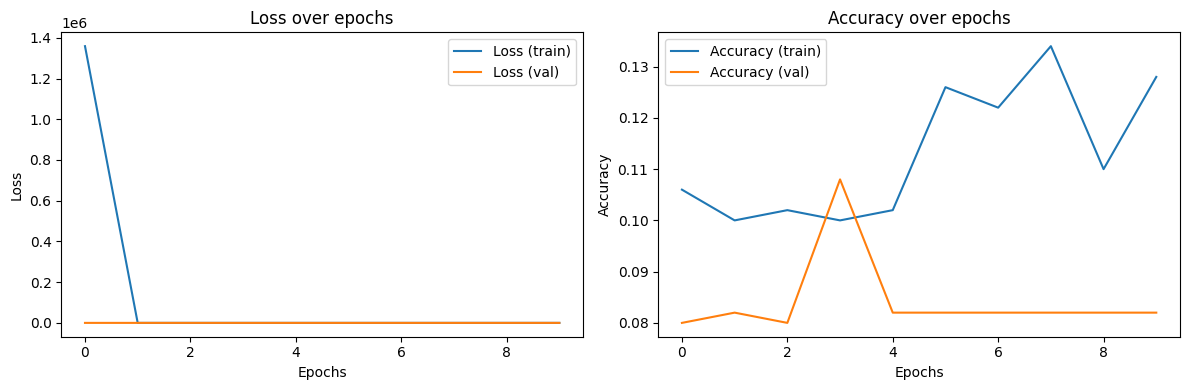

In [8]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss (train)')
    plt.plot(history.history['val_loss'], label='Loss (val)')
    plt.title('Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['output_accuracy'], label='Accuracy (train)')
    plt.plot(history.history['val_output_accuracy'], label='Accuracy (val)')
    plt.title('Accuracy over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Gọi hàm sau khi huấn luyện mô hình
plot_training_history(history)


---